In [1]:
# Import packages
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import numpy as np

# Import differentiation matrices
from diff import *

### Test Finite Difference Matrices

In [104]:
def compute_error(N, diff_mat):
    # Grid
    x=np.linspace(0,2.*np.pi,N+1,endpoint=True)
    h=(x[-1]-x[0])/N
    # Test functions
    u = np.sin(x)
    du= np.cos(x)
    ddu=-np.sin(x)
    # Numerical derivative
    D1,D2=diff_mat(N+1, h, periodic=False)
    err1=D1.dot(u)-du
    err2=D2.dot(u)-ddu
    return np.linalg.norm(err1), np.linalg.norm(err2)
    # return max(abs(err1)), max(abs(err2))

In [110]:
N=10
iterations = 8
err1_o2=[]; err2_o2=[]
err1_o4=[]; err2_o4=[]
err1_o6=[]; err2_o6=[]
cells=[]
for i in range(iterations):
    cells.append(N)
    err1, err2 = compute_error(N,Diff_mat_1D_o2)
    err1_o2.append(err1); err2_o2.append(err2)
    err1, err2 = compute_error(N,Diff_mat_1D_o4)
    err1_o4.append(err1); err2_o4.append(err2)
    err1, err2 = compute_error(N,Diff_mat_1D_o6)
    err1_o6.append(err1); err2_o6.append(err2)
    N*=2

Text(0.5, 1.0, 'L2-norm of finite difference error')

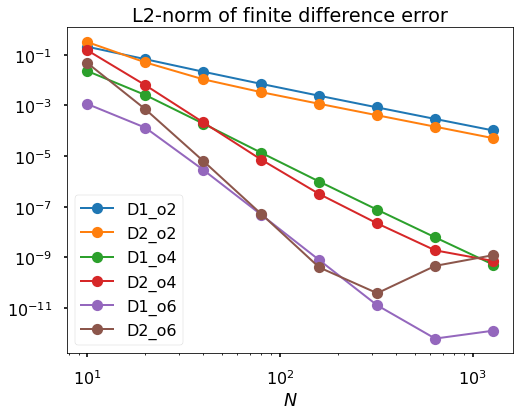

In [113]:
plt.figure(figsize = (8, 6))
plt.xlabel("$N$")
plt.loglog(cells, max_err1_o2, 'o-', lw=2, label='D1_o2')
plt.loglog(cells, max_err2_o2, 'o-', lw=2, label='D2_o2')
plt.loglog(cells, max_err1_o4, 'o-', lw=2, label='D1_o4')
plt.loglog(cells, max_err2_o4, 'o-', lw=2, label='D2_o4')
plt.loglog(cells, max_err1_o6, 'o-', lw=2, label='D1_o6')
plt.loglog(cells, max_err2_o6, 'o-', lw=2, label='D2_o6')
plt.legend(loc='lower left')
